In [1]:
import torch

In [2]:
# 准备睡觉
x = torch.linspace(0, 100).type(torch.FloatTensor)
x

tensor([  0.0000,   1.0101,   2.0202,   3.0303,   4.0404,   5.0505,   6.0606,
          7.0707,   8.0808,   9.0909,  10.1010,  11.1111,  12.1212,  13.1313,
         14.1414,  15.1515,  16.1616,  17.1717,  18.1818,  19.1919,  20.2020,
         21.2121,  22.2222,  23.2323,  24.2424,  25.2525,  26.2626,  27.2727,
         28.2828,  29.2929,  30.3030,  31.3131,  32.3232,  33.3333,  34.3434,
         35.3535,  36.3636,  37.3737,  38.3838,  39.3939,  40.4040,  41.4141,
         42.4242,  43.4343,  44.4444,  45.4545,  46.4646,  47.4747,  48.4848,
         49.4949,  50.5051,  51.5152,  52.5253,  53.5354,  54.5455,  55.5556,
         56.5657,  57.5758,  58.5859,  59.5960,  60.6061,  61.6162,  62.6263,
         63.6364,  64.6465,  65.6566,  66.6667,  67.6768,  68.6869,  69.6970,
         70.7071,  71.7172,  72.7273,  73.7374,  74.7475,  75.7576,  76.7677,
         77.7778,  78.7879,  79.7980,  80.8081,  81.8182,  82.8283,  83.8384,
         84.8485,  85.8586,  86.8687,  87.8788,  88.8889,  89.89

In [3]:
rand = torch.randn(100) * 10
print(rand)
y = x + rand
print(y)

tensor([  3.6177,  -9.9814,  25.8983,   1.8663,  11.9577,   1.7753,  -4.6925,
          9.0756,  20.4801, -15.9545,   9.0691,   1.6657,  -3.9327,  11.1698,
          8.9269,   3.7230,  10.5320, -11.5008,   5.7874,   0.9580,   1.8735,
         10.1902,   0.6483,   4.1889, -10.8142,   3.9038,   3.8338,  -5.2189,
          4.0449,   5.0030,  -4.1524,  -0.0885, -18.5907,   9.0115,  -1.7256,
         -0.3454,  12.4305,  -9.1130,  -9.2819,   3.6147,  -0.1040,   6.3580,
         -6.2837, -10.8599,  -2.0469,   7.5480,   2.7167, -19.1711,  -0.0973,
         -4.9609, -16.7296,  14.1012,   9.5264, -12.3855,  -4.9701,  14.1139,
         -0.7524,  13.4090,  17.9060,   5.3470,  -1.9822,  14.6522,   7.9990,
         -9.7966,  -1.3634, -18.6489,   0.5910,  29.8399,  22.3105,  -1.2837,
         -7.6216,  -3.9939, -20.2402,   8.6563,  -2.4301,  -3.8013, -10.6817,
         -7.4688,   0.7518,  -3.3339,  -3.8254, -17.4132,  -0.2027,   3.8545,
          2.9878,   9.6619, -19.4495,   4.5986,  13.5896, -24.23

In [4]:
#切分训练集和测试集
x_train = x[:-10]
x_test = x[-10:]
y_train = y[:-10]
y_test = y[-10:]

In [5]:
import matplotlib.pyplot as plt  #导入画图的程序包

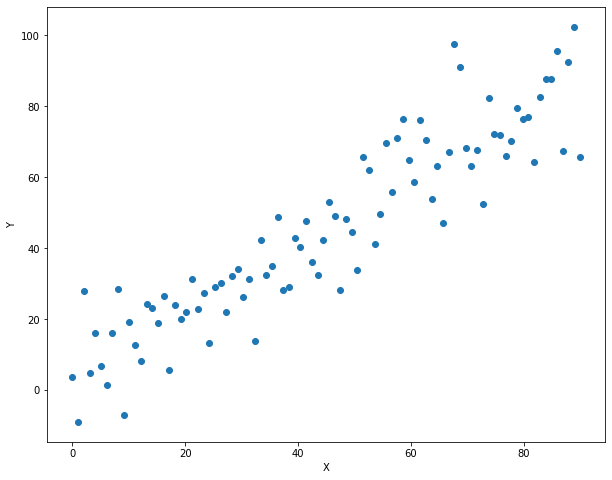

In [6]:
plt.figure(figsize=(10, 8))  #设定绘制窗口大小为10*8 inch
#绘制数据，由于x和y都是自动微分变量，需要用data获取它们包裹的Tensor，并转成Numpy
#plt.plot(x_train.data.numpy(), y_train.data.numpy(), 'o')
plt.plot(x_train.numpy(), y_train.numpy(), 'o')  #由于torch1.5以后的版本不区分张量和自动微分变量，所以不加data也行
plt.xlabel('X')  #添加X轴的标注
plt.ylabel('Y')  #添加Y轴的标注
plt.show()  #画出图形

In [7]:
# 训练
a = torch.rand(1, requires_grad=True)
b = torch.rand(1, requires_grad=True)

In [8]:
learning_rate = 0.0001

In [9]:
for i in range(1000):
    #计算在当前a、b条件下的模型预测数值
    predictions = a.expand_as(x_train) * x_train + b.expand_as(x_train)
    #将所有训练数据代入模型ax+b，计算每个的预测值。这里的x_train和predictions都是（90，1）的张量。
    #Expand_as的作用是将a,b扩充维度到和x_train一致
    loss = torch.mean((predictions - y_train) ** 2)  #通过与标签数据y比较，计算误差，loss是一个标量
    print('loss:', loss)
    loss.backward()  #对损失函数进行梯度反传
    #利用上一步计算中得到的a的梯度信息更新a中的data数值
    a.data.add_(- learning_rate * a.grad.data)
    #利用上一步计算中得到的b的梯度信息更新b中的data数值
    b.data.add_(- learning_rate * b.grad.data)
    #增加这部分代码，清空存储在变量a、b中的梯度信息，以免在backward的过程中反复不停地累加
    a.grad.data.zero_()  #清空a的梯度数值
    b.grad.data.zero_()  #清空b的梯度数值

loss: tensor(974.7913, grad_fn=<MeanBackward0>)
loss: tensor(292.1046, grad_fn=<MeanBackward0>)
loss: tensor(148.8794, grad_fn=<MeanBackward0>)
loss: tensor(118.8310, grad_fn=<MeanBackward0>)
loss: tensor(112.5267, grad_fn=<MeanBackward0>)
loss: tensor(111.2038, grad_fn=<MeanBackward0>)
loss: tensor(110.9261, grad_fn=<MeanBackward0>)
loss: tensor(110.8675, grad_fn=<MeanBackward0>)
loss: tensor(110.8551, grad_fn=<MeanBackward0>)
loss: tensor(110.8522, grad_fn=<MeanBackward0>)
loss: tensor(110.8513, grad_fn=<MeanBackward0>)
loss: tensor(110.8509, grad_fn=<MeanBackward0>)
loss: tensor(110.8506, grad_fn=<MeanBackward0>)
loss: tensor(110.8503, grad_fn=<MeanBackward0>)
loss: tensor(110.8500, grad_fn=<MeanBackward0>)
loss: tensor(110.8497, grad_fn=<MeanBackward0>)
loss: tensor(110.8494, grad_fn=<MeanBackward0>)
loss: tensor(110.8491, grad_fn=<MeanBackward0>)
loss: tensor(110.8488, grad_fn=<MeanBackward0>)
loss: tensor(110.8484, grad_fn=<MeanBackward0>)
loss: tensor(110.8482, grad_fn=<MeanBack

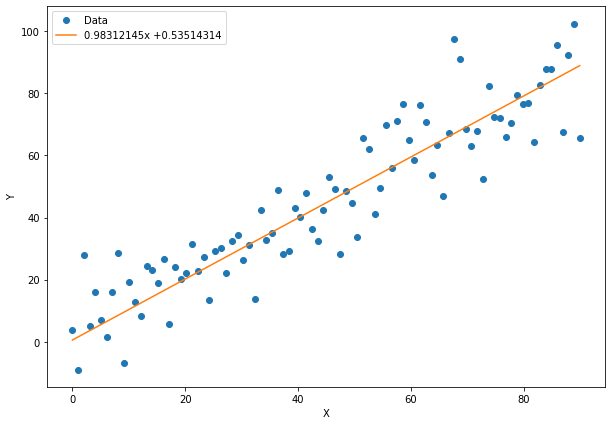

In [10]:
x_data = x_train.data.numpy()  #将x中的数据转换成NumPy数组
plt.figure(figsize=(10, 7))  #定义绘图窗口
xplot, = plt.plot(x_data, y_train.data.numpy(), 'o')  #绘制x, y散点图
yplot, = plt.plot(x_data, a.data.numpy() * x_data + b.data.numpy())  #绘制拟合直线图
plt.xlabel('X')  #给横坐标轴加标注
plt.ylabel('Y')  #给纵坐标轴加标注
str1 = str(a.data.numpy()[0]) + 'x +' + str(b.data.numpy()[0])  #将拟合直线的参数a、b显示出来
plt.legend([xplot, yplot], ['Data', str1])  #绘制图例
plt.show()  #将图形画出来

In [11]:
#预测
predictions = a.expand_as(x_test) * x_test + b.expand_as(x_test)  #计算模型的预测结果
predictions  #输出

tensor([89.9098, 90.9029, 91.8959, 92.8890, 93.8820, 94.8751, 95.8681, 96.8612,
        97.8542, 98.8473], grad_fn=<AddBackward0>)

In [13]:
import numpy as np

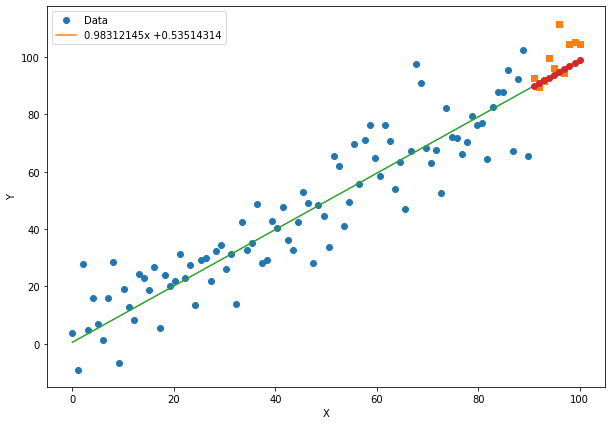

In [14]:
x_data = x_train.data.numpy()  #获得x包裹的数据
x_pred = x_test.data.numpy()  #获得包裹的测试数据的自变量
plt.figure(figsize=(10, 7))  #设定绘图窗口大小
plt.plot(x_data, y_train.data.numpy(), 'o')  #绘制训练数据
plt.plot(x_pred, y_test.data.numpy(), 's')  #绘制测试数据
x_data = np.r_[x_data, x_test.data.numpy()]
plt.plot(x_data, a.data.numpy() * x_data + b.data.numpy())  #绘制拟合数据
plt.plot(x_pred, a.data.numpy() * x_pred + b.data.numpy(), 'o')  #绘制预测数据
plt.xlabel('X')  #更改横坐标轴标注
plt.ylabel('Y')  #更改纵坐标轴标注
str1 = str(a.data.numpy()[0]) + 'x +' + str(b.data.numpy()[0])  #图例信息
plt.legend([xplot, yplot], ['Data', str1])  #绘制图例
plt.show()